# ***CUSTOMER LIFE TIME VALUE PREDICTION***

In [1]:
#Importing all Required  Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
import math
#Library for one hot encoding
from sklearn.preprocessing import OneHotEncoder
#train test split
from sklearn.model_selection import train_test_split
#Evaluation metrics
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [3]:
#path to csv file
path='./Data/merged_df.csv'

In [4]:
#load the data
df=pd.read_csv(path)
df.head()

,CITY,Cust Type,Customer No.,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Recovrbl Exp,Regn No,Service Advisor Name,Technician Name,Total Amt Wtd Tax.,User ID,InvoiceDateTime,JobCardDateTime,service_time,city,district,Service_Time_Hours,year,KMs binned,model_type,Item Category,Category Count,Net Value
0,thane,Retail,67849,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,0.00,KA19MA1291,nan,RUPESH,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,Thane,Maharashtra,477.01,2015,35k < 65k,Hatchback,P001,2.00,1203.14
1,thane,Retail,67849,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,0.00,KA19MA1291,nan,RUPESH,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,Thane,Maharashtra,477.01,2015,35k < 65k,Hatchback,P002,4.00,2348.75
2,thane,Retail,67849,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,0.00,KA19MA1291,nan,RUPESH,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,Thane,Maharashtra,477.01,2015,35k < 65k,Hatchback,P010,1.00,500.06
3,thnae,Retail,84419,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,0.00,MH43R3046,nan,PRASHANT,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,Thane,Maharashtra,19.92,2015,65k < 95k,Hatchback,P001,4.00,804.26
4,thnae,Retail,84419,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,0.00,MH43R3046,nan,PRASHANT,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,Thane,Maharashtra,19.92,2015,65k < 95k,Hatchback,P011,1.00,197.03


In [27]:
df['year'].value_counts()

2015    248353
2014    201456
2016    188677
2013    112627
2012     36668
Name: year, dtype: int64

In [7]:
#For Customer Life time value prediction we need data only of 2015 hence Subset the data
cltv_df=df[['Customer No.','Cust Type','Invoice No','Make','Model','Total Amt Wtd Tax.','district','year']]

#Subsetting the data
cltv_df=cltv_df[cltv_df['year']==2015]
cltv_df

,Customer No.,Cust Type,Invoice No,Make,Model,Total Amt Wtd Tax.,district,year
0,67849,Retail,7005200002,GENERAL MOTORS,SPARK,4051.95,Maharashtra,2015
1,67849,Retail,7005200002,GENERAL MOTORS,SPARK,4051.95,Maharashtra,2015
2,67849,Retail,7005200002,GENERAL MOTORS,SPARK,4051.95,Maharashtra,2015
3,84419,Retail,7005200003,TATA MOTORS,INDICA,1001.29,Maharashtra,2015
4,84419,Retail,7005200003,TATA MOTORS,INDICA,1001.29,Maharashtra,2015
...,...,...,...,...,...,...,...,...
248348,145092,Retail,7185000136,MAHINDRA & MAHINDRA,VERITO,6003.47,Telangana,2015
248349,145092,Retail,7185000136,MAHINDRA & MAHINDRA,VERITO,6003.47,Telangana,2015
248350,142152,Retail,7185000137,MAHINDRA & MAHINDRA,XUV 500,25529.60,Telangana,2015
248351,142152,Retail,7185000137,MAHINDRA & MAHINDRA,XUV 500,25529.60,Telangana,2015


In [9]:
#Groupby of data
cltv_group=cltv_df.groupby(['Customer No.','Cust Type','district','Make','Model']).agg({'Invoice No':'nunique','Total Amt Wtd Tax.':'mean'}).reset_index()
#cltv_group.drop('year',1,inplace=True)
cltv_group

,Customer No.,Cust Type,district,Make,Model,Invoice No,Total Amt Wtd Tax.
0,10000,Retail,Telangana,MARUTI SUZUKI,WAGONR,1,185.96
1,100000,Retail,Gujarat,HYUNDAI,ACCENT,1,6026.05
2,100001,Retail,Maharashtra,MAHINDRA & MAHINDRA,BOLERO,1,697.59
3,100001,Retail,Maharashtra,SKODA,SUPERB,1,1058.44
4,100001,Retail,Maharashtra,TOYOTA,INNOVA,1,2507.72
...,...,...,...,...,...,...,...
77156,MFCCM24,Retail,Maharashtra,MAHINDRA & MAHINDRA,XYLO,1,56409.69
77157,MFCWP01,MFCWL,Maharashtra,MARUTI SUZUKI,WAGONR,1,0.00
77158,MFCWP01,Retail,Maharashtra,HYUNDAI,GETZ,3,1171.43
77159,MFCWP01,Retail,Maharashtra,MARUTI SUZUKI,WAGONR,1,8079.11


In [13]:
#finding customer value for year 2015
cltv_group['customer_value']=cltv_group['Invoice No']*cltv_group['Total Amt Wtd Tax.']

In [14]:
cltv_group

,Customer No.,Cust Type,district,Make,Model,Invoice No,Total Amt Wtd Tax.,customer_value
0,10000,Retail,Telangana,MARUTI SUZUKI,WAGONR,1,185.96,185.96
1,100000,Retail,Gujarat,HYUNDAI,ACCENT,1,6026.05,6026.05
2,100001,Retail,Maharashtra,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59
3,100001,Retail,Maharashtra,SKODA,SUPERB,1,1058.44,1058.44
4,100001,Retail,Maharashtra,TOYOTA,INNOVA,1,2507.72,2507.72
...,...,...,...,...,...,...,...,...
77156,MFCCM24,Retail,Maharashtra,MAHINDRA & MAHINDRA,XYLO,1,56409.69,56409.69
77157,MFCWP01,MFCWL,Maharashtra,MARUTI SUZUKI,WAGONR,1,0.00,0.00
77158,MFCWP01,Retail,Maharashtra,HYUNDAI,GETZ,3,1171.43,3514.30
77159,MFCWP01,Retail,Maharashtra,MARUTI SUZUKI,WAGONR,1,8079.11,8079.11


In [15]:
#Removing Customers with zero value
zero_group=cltv_group[cltv_group['customer_value']<=0].index
cltv_group.drop(zero_group,0,inplace=True)
cltv_group


,Customer No.,Cust Type,district,Make,Model,Invoice No,Total Amt Wtd Tax.,customer_value
0,10000,Retail,Telangana,MARUTI SUZUKI,WAGONR,1,185.96,185.96
1,100000,Retail,Gujarat,HYUNDAI,ACCENT,1,6026.05,6026.05
2,100001,Retail,Maharashtra,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59
3,100001,Retail,Maharashtra,SKODA,SUPERB,1,1058.44,1058.44
4,100001,Retail,Maharashtra,TOYOTA,INNOVA,1,2507.72,2507.72
...,...,...,...,...,...,...,...,...
77155,MFCCM23,Retail,Maharashtra,MAHINDRA & MAHINDRA,XYLO,2,7193.21,14386.43
77156,MFCCM24,Retail,Maharashtra,MAHINDRA & MAHINDRA,XYLO,1,56409.69,56409.69
77158,MFCWP01,Retail,Maharashtra,HYUNDAI,GETZ,3,1171.43,3514.30
77159,MFCWP01,Retail,Maharashtra,MARUTI SUZUKI,WAGONR,1,8079.11,8079.11


In [16]:
#Creating Dataframe for Modelling 
model_df=cltv_group[['Customer No.','Cust Type','district','Make','Invoice No','Total Amt Wtd Tax.','customer_value']]
model_df

,Customer No.,Cust Type,district,Make,Invoice No,Total Amt Wtd Tax.,customer_value
0,10000,Retail,Telangana,MARUTI SUZUKI,1,185.96,185.96
1,100000,Retail,Gujarat,HYUNDAI,1,6026.05,6026.05
2,100001,Retail,Maharashtra,MAHINDRA & MAHINDRA,1,697.59,697.59
3,100001,Retail,Maharashtra,SKODA,1,1058.44,1058.44
4,100001,Retail,Maharashtra,TOYOTA,1,2507.72,2507.72
...,...,...,...,...,...,...,...
77155,MFCCM23,Retail,Maharashtra,MAHINDRA & MAHINDRA,2,7193.21,14386.43
77156,MFCCM24,Retail,Maharashtra,MAHINDRA & MAHINDRA,1,56409.69,56409.69
77158,MFCWP01,Retail,Maharashtra,HYUNDAI,3,1171.43,3514.30
77159,MFCWP01,Retail,Maharashtra,MARUTI SUZUKI,1,8079.11,8079.11


In [17]:
#Renaming Columns
model_df.columns=['Cust_no.','Cust','State','Make','Count_invoice','Avg_revenue','customer_value']

model_df

,Cust_no.,Cust,State,Make,Count_invoice,Avg_revenue,customer_value
0,10000,Retail,Telangana,MARUTI SUZUKI,1,185.96,185.96
1,100000,Retail,Gujarat,HYUNDAI,1,6026.05,6026.05
2,100001,Retail,Maharashtra,MAHINDRA & MAHINDRA,1,697.59,697.59
3,100001,Retail,Maharashtra,SKODA,1,1058.44,1058.44
4,100001,Retail,Maharashtra,TOYOTA,1,2507.72,2507.72
...,...,...,...,...,...,...,...
77155,MFCCM23,Retail,Maharashtra,MAHINDRA & MAHINDRA,2,7193.21,14386.43
77156,MFCCM24,Retail,Maharashtra,MAHINDRA & MAHINDRA,1,56409.69,56409.69
77158,MFCWP01,Retail,Maharashtra,HYUNDAI,3,1171.43,3514.30
77159,MFCWP01,Retail,Maharashtra,MARUTI SUZUKI,1,8079.11,8079.11


In [18]:
#Final dummyencoded dataframe
A=pd.get_dummies(data=model_df, columns=['Cust', 'State','Make'])


In [19]:
final_df=pd.DataFrame(A)

In [20]:
final_df.drop('Cust_no.',1,inplace=True)
final_df

,Count_invoice,Avg_revenue,customer_value,Cust_Corporate others,Cust_Corporate- M&M,Cust_Fleets,Cust_Insurance,Cust_MFCWL,Cust_Retail,State_Andhra Pradesh,State_Arunachal Pradesh,State_Bihar,State_Chandigarh,State_Chattisgarh,State_Chhattisgarh,State_Dadra & Nagar Haveli,State_Daman & Diu,State_Daman and Diu,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu & Kashmir,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Lakshadweep,State_Madhya Pradesh,State_Maharashtra,State_Pondicherry,State_Puducherry,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO
0,1,185.96,185.96,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6026.05,6026.05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,697.59,697.59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1058.44,1058.44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,2507.72,2507.72,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77155,2,7193.21,14386.43,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
77156,1,56409.69,56409.69,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
77158,3,1171.43,3514.30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77159,1,8079.11,8079.11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
#Train Test Split 
X=final_df.drop('customer_value',1)
y=final_df['customer_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

## Decision Tree Regressor

In [23]:
#Implementing Decison Tree Regressor
from sklearn.tree import DecisionTreeRegressor

Text(0.5, 1.0, 'accuracy vs max_depth')

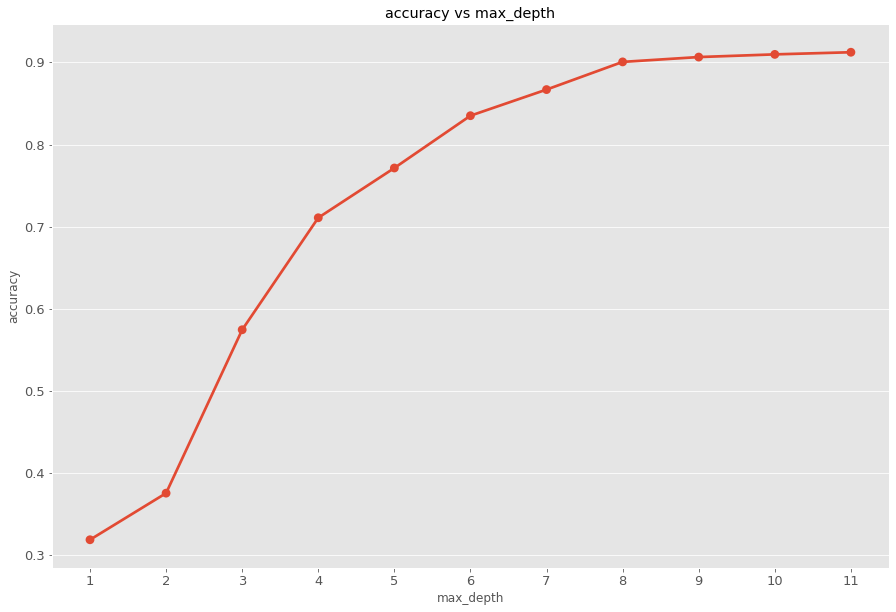

In [19]:
#Finding the Optimal Value For Max Depth
max_depth_range = list(range(1,12))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    reg = DecisionTreeRegressor(max_depth = depth, random_state = 18)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    accuracy.append(score)
    
x=max_depth_range
y=accuracy

plt.figure(figsize=(15,10))
sns.pointplot(x,y)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('accuracy vs max_depth')

In [24]:
#Applying  Decision Tree Regressor
X=final_df.drop('customer_value',1)
y=final_df['customer_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)
dt_reg = DecisionTreeRegressor(max_depth=10, random_state = 18)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)
#Evaluation metric
mse =mean_squared_error(y_test,y_pred)
print('mse score:',mse)
print('=='*100)
rmse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(rmse)
print('Rmse score:',rmse)

#accuracy score on train data
train_score=dt_reg.score(X_train,y_train)
print('train score:',train_score)
print('=='*100)

#accuracy score on test data
test_score=dt_reg.score(X_test,y_test)
print('test score:',test_score)
print('=='*100)




mse score: 19167063.762327276
Rmse score: 4378.020530139995
train score: 0.9990252321683653
test score: 0.9531383161272662


In [25]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_test,y_pred)
print('R2 score:',R2_Score)
print('=='*100)


R2 score: 0.9531383161272662


In [26]:
#Repeated k fold and cross val score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

rkf=RepeatedKFold(n_splits=5, n_repeats=5, random_state=9)


#Crossvalidation process
scores = cross_val_score(dt_reg, X, y, cv=rkf, scoring='r2')
print('scores',scores)
print('=='*100)

print('Mean_score:',scores.mean())
print('=='*100)

print('std_score:',scores.std())

scores [0.90790665 0.97415786 0.64100803 0.98036516 0.93249009 0.95486094
 0.95926978 0.62690613 0.98298464 0.97612112 0.9273074  0.9512028
 0.93943379 0.96743831 0.63166652 0.61556485 0.92959458 0.96438202
 0.9092037  0.97411048 0.9430872  0.97531966 0.99033692 0.92678584
 0.66615517]
Mean_score: 0.8899063860692661
std_score: 0.12891165743252522


In [27]:
from sklearn.metrics import mean_squared_log_error
#For test
mean_squared_log_error(dt_reg.predict(X_test),y_test)

0.01148029937311222

In [28]:
#For Train
mean_squared_log_error(dt_reg.predict(X_train),y_train)

0.007886390162383168